<a href="https://colab.research.google.com/github/sgr1118/Kaggle-Transcription/blob/main/Kaggle_Transcription_titanic(220804).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# 라이브러리 불러오기
import pandas as pd
pd.set_option('max_rows',200)
pd.set_option('max_columns',12)
path = '/content/drive/MyDrive/Aiffel/fliped/Kaggle-Transcription/titanic'

data = pd.read_csv(path + '/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Part1: Exploratory Data Analysis(EDA)

In [2]:
import numpy as np
import pandas as mp
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
# plt.style.use : matplotlib 스타일시트 설정
import warnings
warnings.filterwarnings('ignore') # 경고메시지
%matplotlib inline

In [3]:
# 결측치 확인
data.isnull().sum()
# Age : 177개, Cabin : 687개, Embarked : 2개
# DF에서 왜 Series 형태로 출력되는가?
# T : 1, F : 0 이기 때문

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

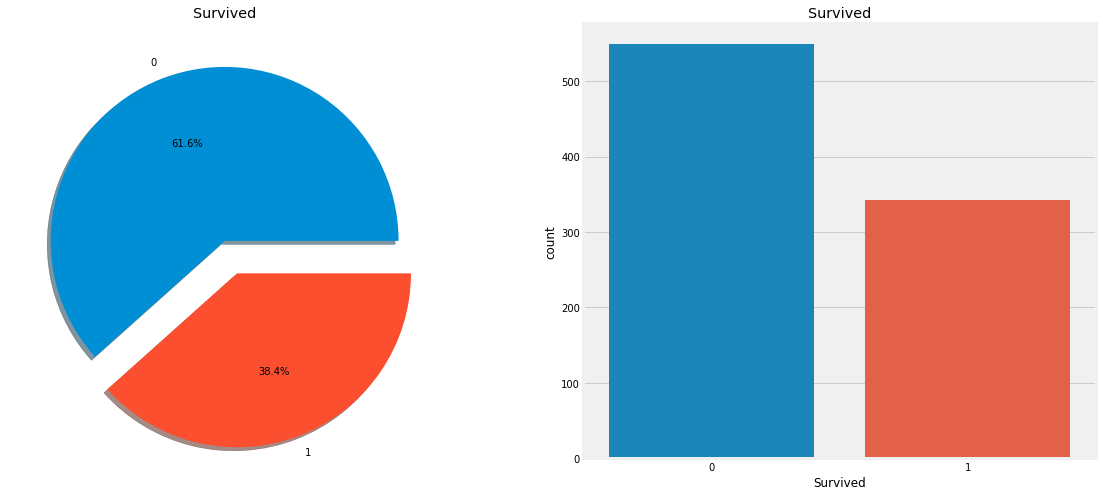

In [4]:
# 시각화
f, ax = plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0.0,0.2],
                                         autopct='%1.1f%%',ax=ax[0], shadow=True)
# explode : 부채꼴이 파이 차트의 중심에서 벗어나는 정도를 설정
# shadow : True로 설정하면, 파이 차트에 그림자가 표시
# autopct : 부채꼴 안에 표시될 숫자의 형식을 지정
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [5]:
# Analysing The Features

# Sex > Categorical Frature
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

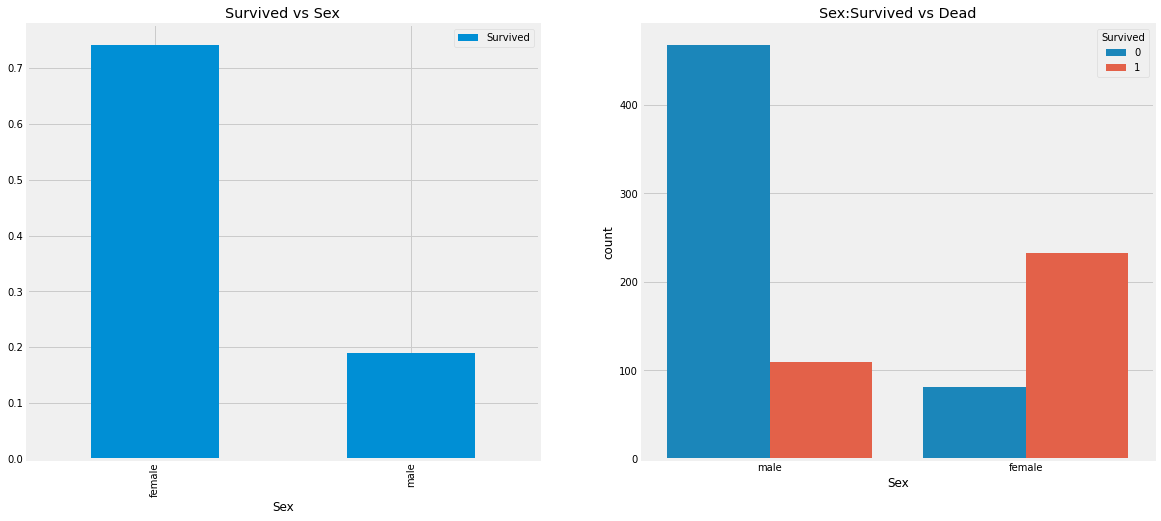

In [6]:
# 성별 생존 시각화
f,ax = plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()
# 남/녀 간 생종율을 비교한다면 여성이 높고, 생존자 수를 비교한다면 여성이 남성보다 많다.

In [7]:
# Pclass --> Ordinal Feature
pd.crosstab(data.Pclass,data.Survived,
            margins=True).style.background_gradient(cmap='summer_r')
# style.background_gradient : 수치의 크기를 색상 온도로 보는것


Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


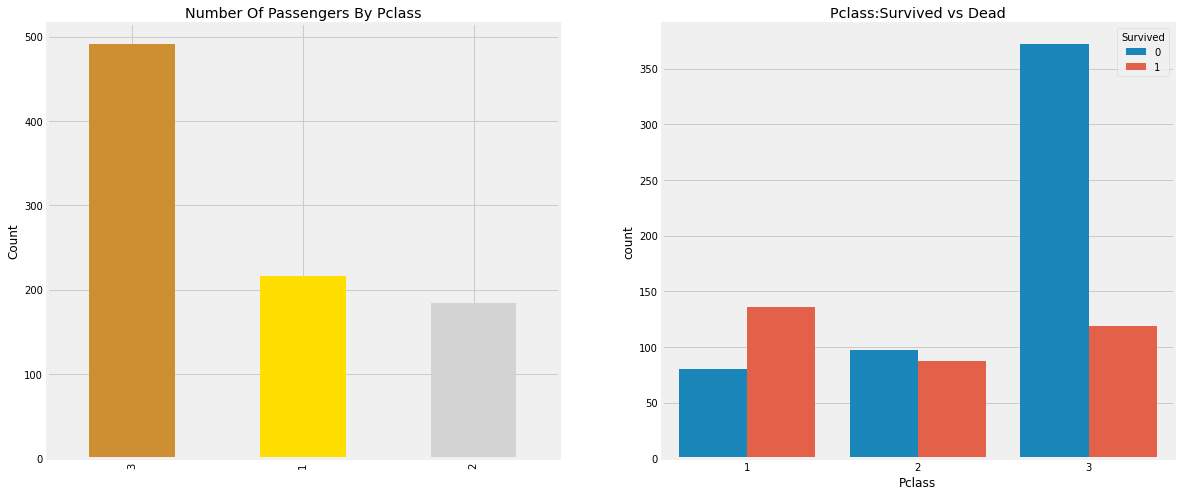

In [8]:
# 승선별 생존율
f,ax = plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD8F32', '#FFDF00', '#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [9]:
# Pclass --> Ordinal Feature
pd.crosstab([data.Sex,data.Survived],data.Pclass,
            margins=True).style.background_gradient(cmap='summer_r')
# [data.Sex,data.Survived],data.Pclass 두 변수를 그룹으로 묶고 Pclass의 수치를 나타냄

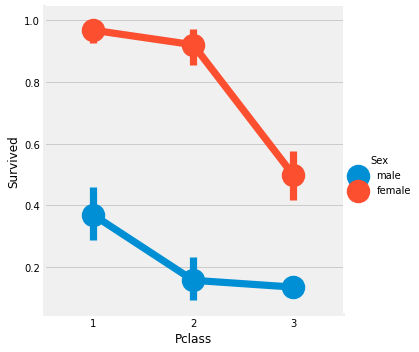

In [10]:
# class별 남녀의 생존율
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

In [11]:
# Age--> Continous Feature

print('Oldest Passenger was of:', data['Age'].max(), 'years')
print('Youngest Passenger was of:', data['Age'].min(), 'years')
print('Average Age on the ship:', data['Age'].mean(), 'years')

Oldest Passenger was of: 80.0 years
Youngest Passenger was of: 0.42 years
Average Age on the ship: 29.69911764705882 years


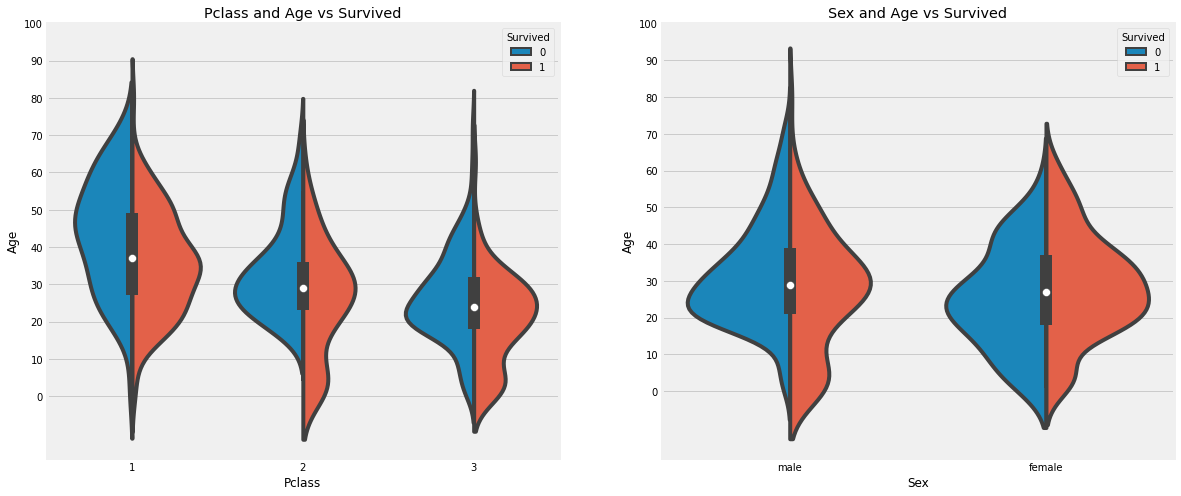

In [12]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot('Pclass', 'Age', hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot('Sex', 'Age', hue='Survived', data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()


In [13]:
data['Initial'] = 0
for i in data:
  data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')
# str.extract('([A-Za-z]+)\.') : 띄어쓰기로 시작해 모든 알파벳이 포함된 문자열을 한 번이상 반복하다가
# dot(.)으로 마무리하는 문자열

In [14]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')
# pd.plot.T : 시각화 결과물의 축을 바꿔준다

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [15]:
data['Initial'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [16]:
# 값 대체
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [17]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [18]:
# Filling NaN Ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46
# 'Age'가 결측값이면서 해당하는 Initial에 나이를 대입해줘라

In [19]:
data.Age.isnull().any()
# pd.any() : 요소가 True인지 여부를 반환

False

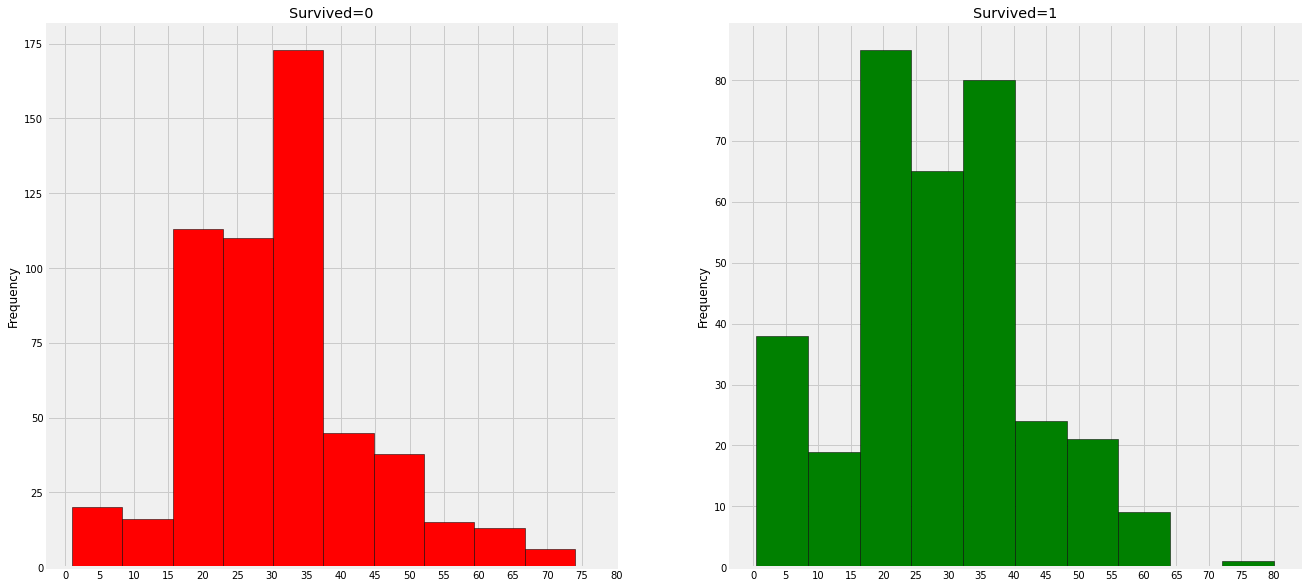

In [20]:
f,ax = plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=10, edgecolor='black', color='red')
ax[0].set_title('Survived=0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1], bins=10, edgecolor='black', color='green')
ax[1].set_title('Survived=1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()
# hist(bins=) : bins 파라미터는 히스토그램의 가로축 구간의 개수

# sns.factorplot

-  sns.factorplot(x,y,hue) : y평균값 그래프. hue로 지정된 필드의 종류만큼 라인이 그려짐.

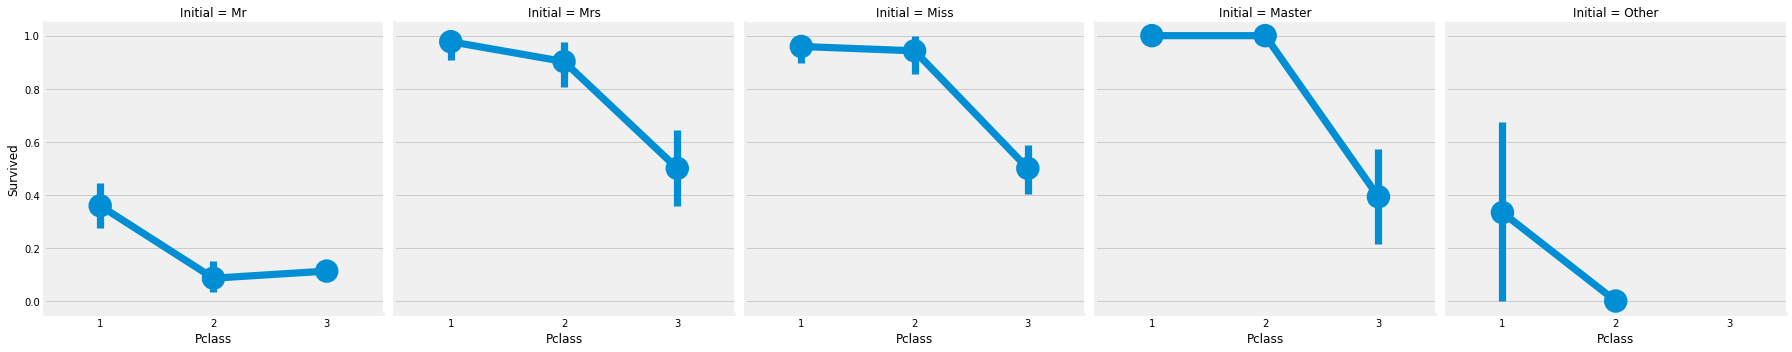

In [21]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)
plt.show()

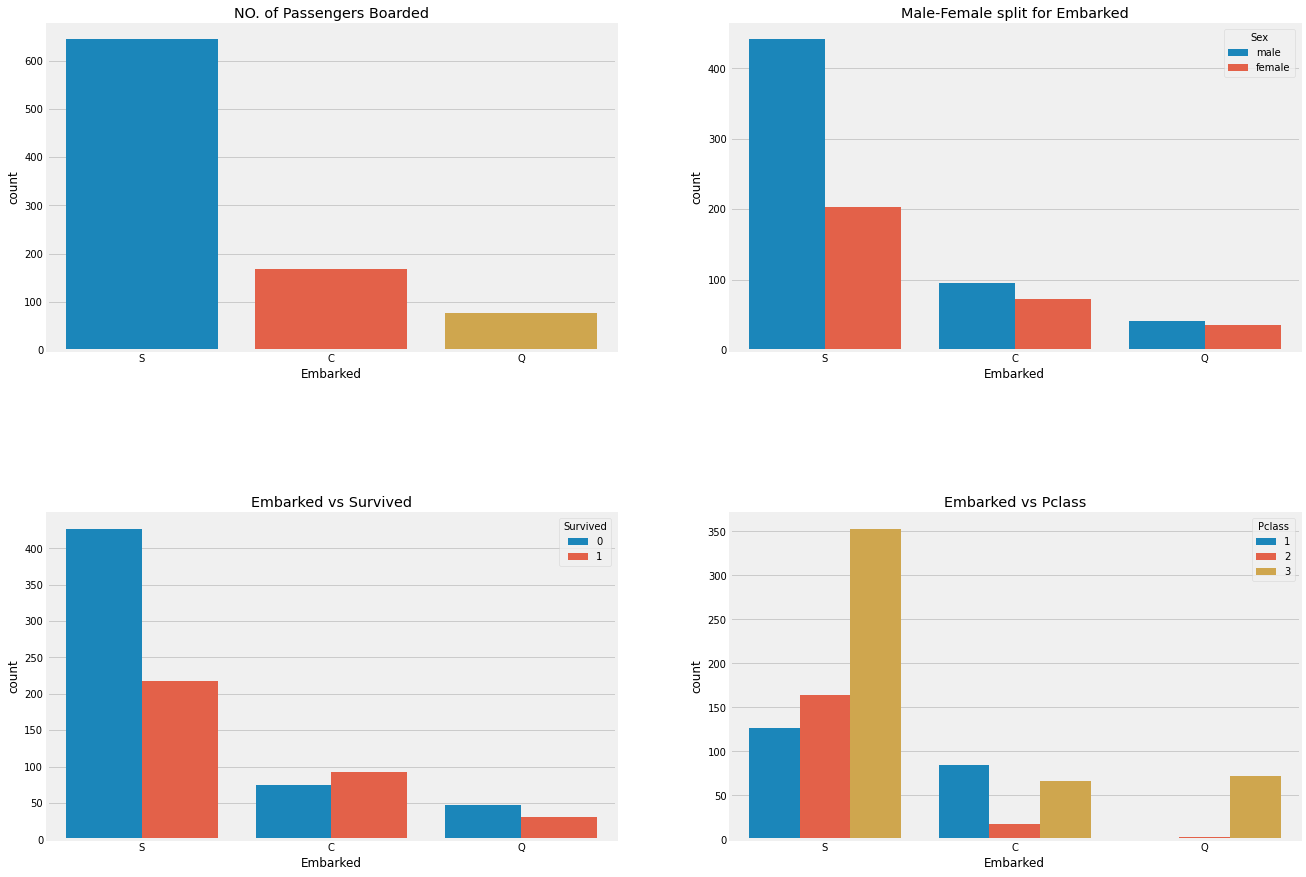

In [22]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked', data=data, ax=ax[0,0])
ax[0,0].set_title('NO. of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0,1])
ax[0,1].set_title('Male-Female split for Embarked')
sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()
# wspace, hspace : 가로 세로 간격

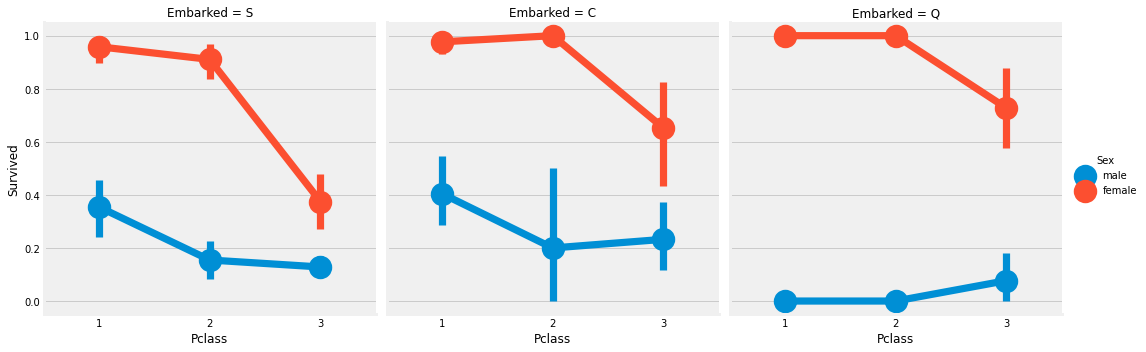

In [23]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)
plt.show()

In [24]:
# Filling Embarked NaN

data['Embarked'].fillna('S', inplace = True)
data.Embarked.isnull().any()

# Embarked의 결측치를 'S'로 채워준다.

False

In [25]:
# SibSip-->Discrete Feature
# This feature represents whether a person is alone or with his family members.
# Sibling = brother, sister, stepbrother, stepsister
# Spouse = husband, wife

# 생존별 SibSp 데이터 분포
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


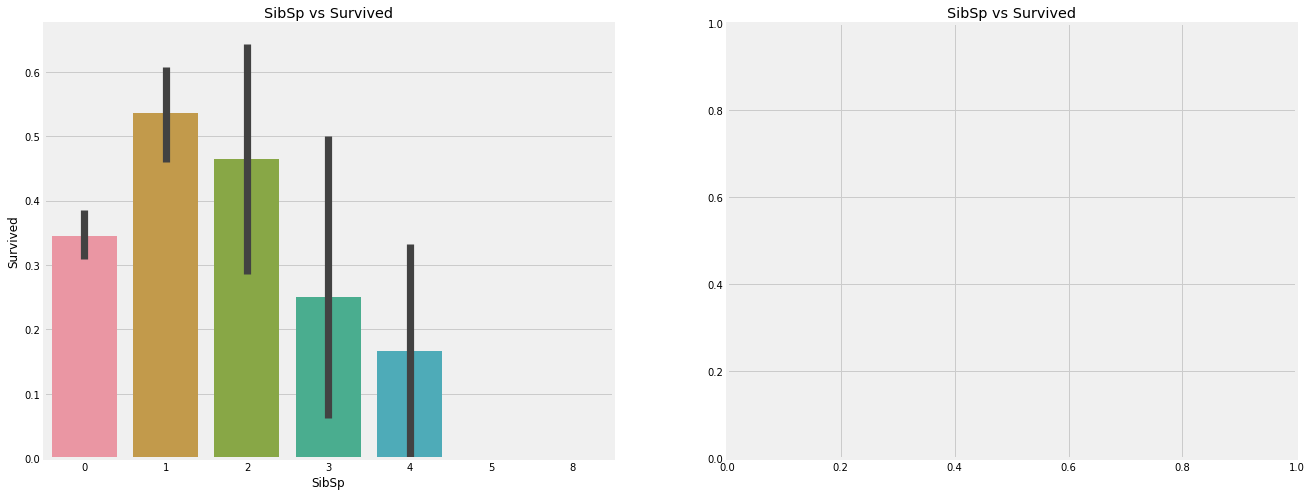

In [26]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

# 두 번째 factorplot은 출력 불가 이유를 알 수 없어서 넘어갔다

In [27]:
# 등석별 SibSp 데이터 분포
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [28]:
# 등석별 동반한 부모와 아이의 분포
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


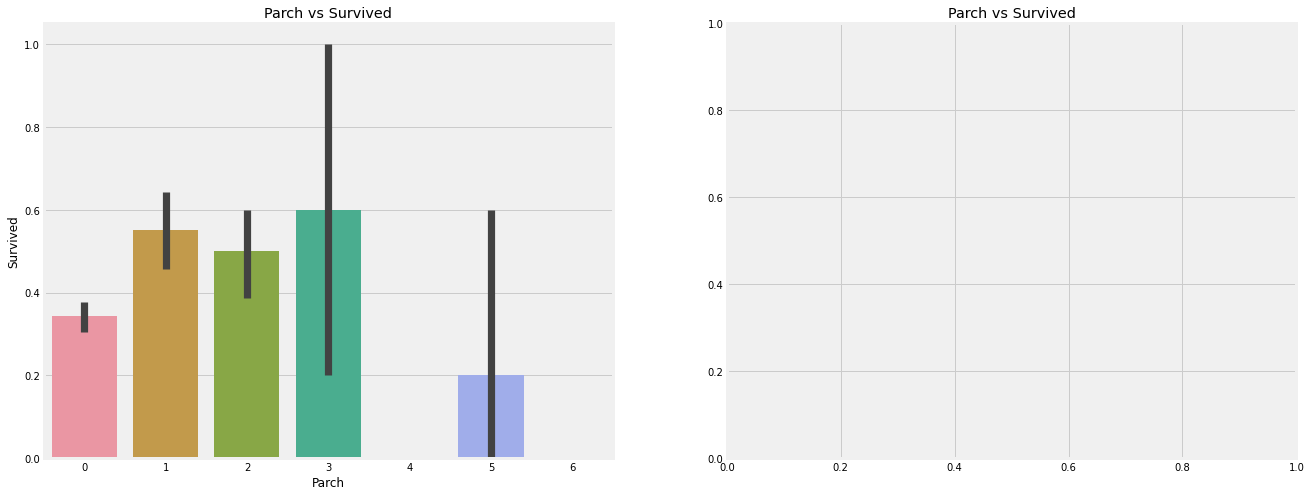

In [29]:
#
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch','Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch','Survived',data=data,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

# 위와 같은 현상이 발생하여 차후 원인을 분석하기로 함

In [30]:
# Fare--> Continous Feature

print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

# 요금의 최고가, 최저가, 평균가 구하기
# 요금이 0원이라면 무료로 탑승한 사람이 있다는 것

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


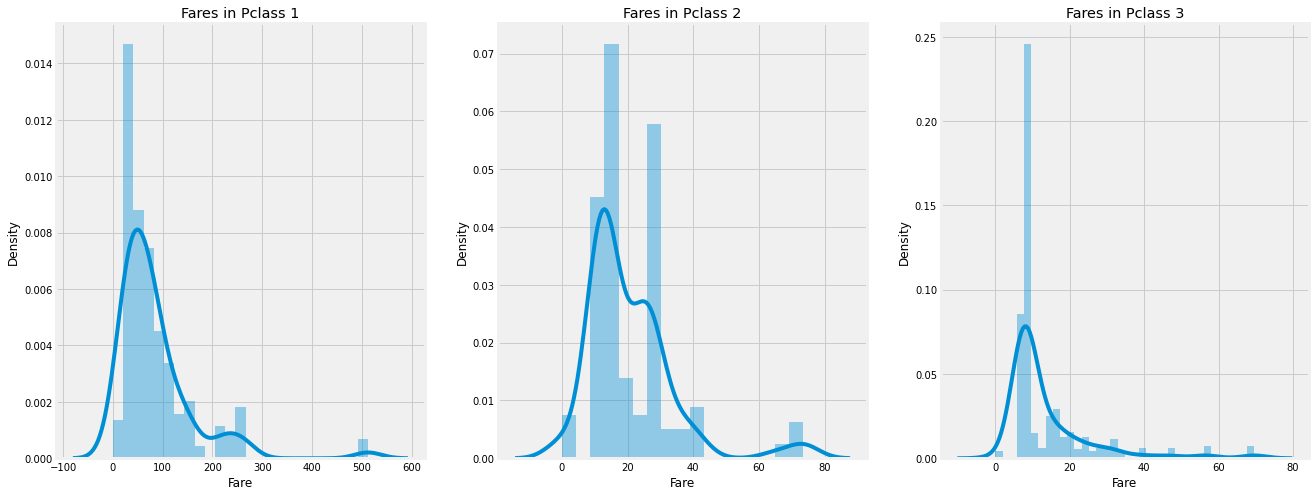

In [31]:
# 등석별 요금 분포
f, ax = plt.subplots(1,3, figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

# 1 > 2 > 3 순으로 요금이 높다. 이는 Pclass 1이 1등석이기 때문이다.

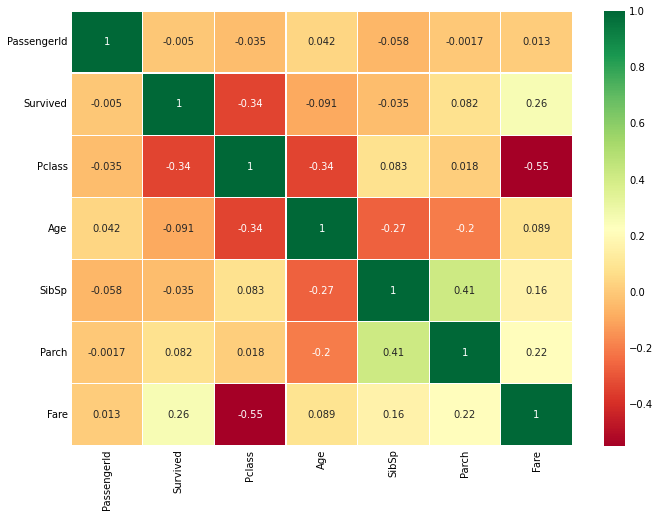

In [33]:
# Correlation Between The Features

sns.heatmap(data.corr(), annot=True, cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

# Part2: Feature Engineering and Data Cleaning

In [34]:
# Age_band : 연령대별 분류

data['Age_band'] = 0
data.loc[data['Age']<=16, 'Age_band'] = 0
data.loc[(data['Age']>16) & (data['Age']<=32), 'Age_band'] = 1
data.loc[(data['Age']>32) & (data['Age']<=48), 'Age_band'] = 2
data.loc[(data['Age']>48) & (data['Age']<=64), 'Age_band'] = 3
data.loc[data['Age']>64, 'Age_band'] = 4
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,...,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,...,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,...,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,...,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,...,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,...,373450,8.0500,NaN,S,Mr,2


In [35]:
# 연령대별 빈도 확인
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


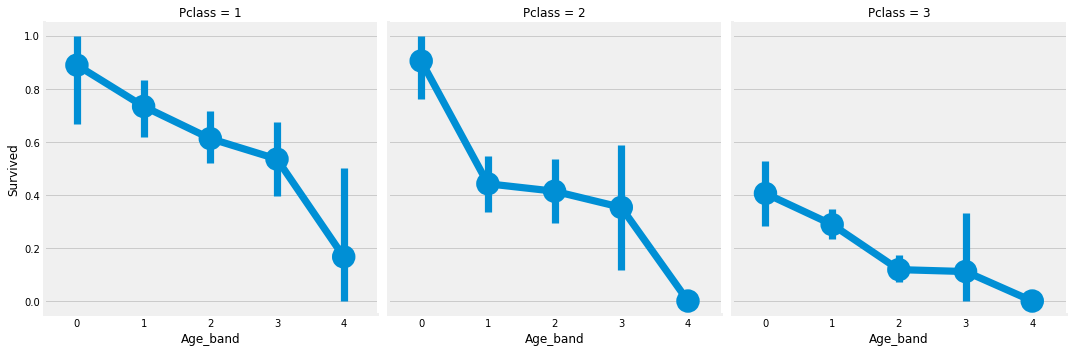

In [36]:
# 등석을 기준으로 연령대별 생존율
sns.factorplot('Age_band', 'Survived', data=data, col = 'Pclass')
plt.show()

ValueError: ignored

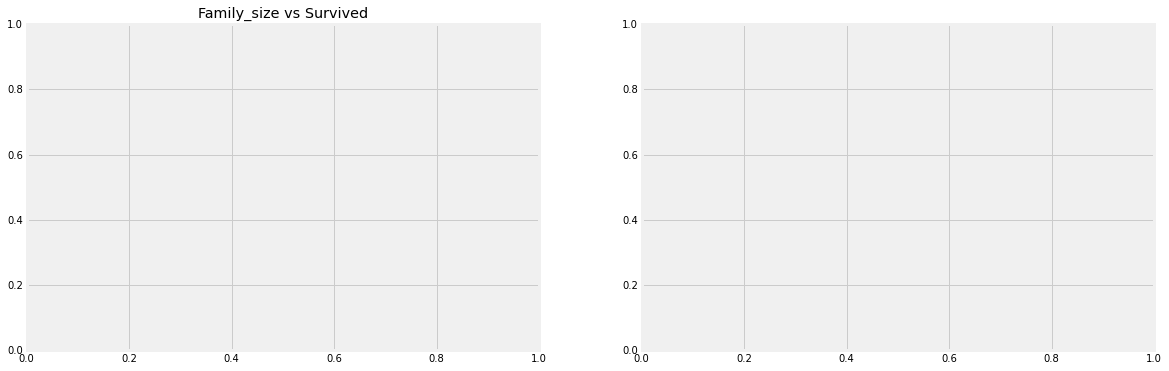

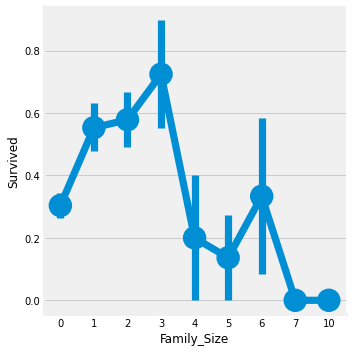

In [40]:
# Family_Size and Alone
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp'] # 가족으로 묶어주기
data['Alone'] = 0
data.loc[data.Family_Size==0,'Alone'] = 1

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Family_Size', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Family_size vs Survived')
sns.factorplot('Aione', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Aione vs Survived')
plt.close(2)
plt.close(3)
plt.show()

# 두 번째 factorplot은 출력 불가 이유를 알 수 없어서 넘어갔다

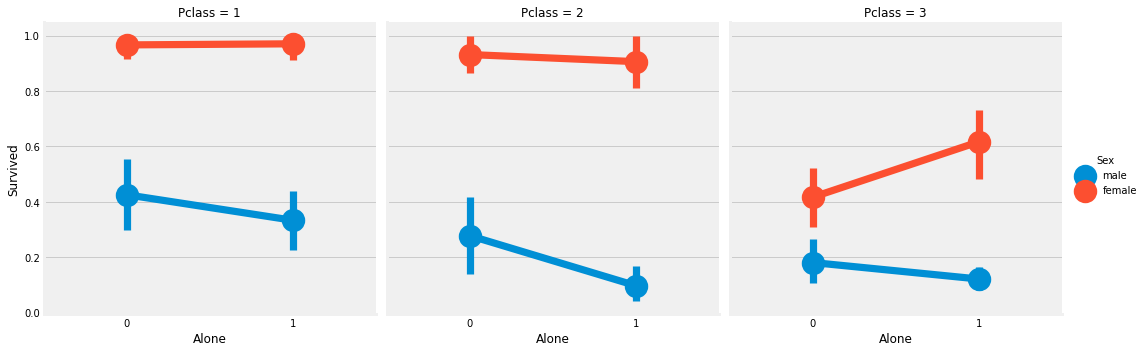

In [41]:
# 성별을 기준으로 단일 인구의 생존율 비교
sns.factorplot('Alone','Survived',data=data,hue='Sex',col='Pclass')
plt.show()

# pd.qcut

- 수치형 변수를 특정 구간으로 나눈 범주형 레이블을 생성

- [참고](https://kimdingko-world.tistory.com/209)

In [42]:
# Fare_Range
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


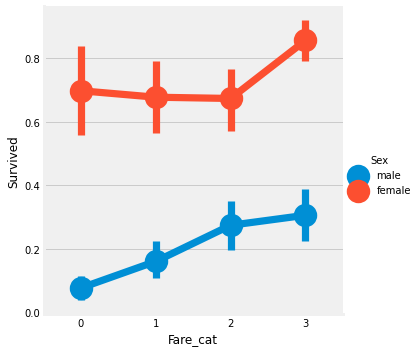

In [43]:
# Fare 구간 나누기
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

# 요금구간 별 성별의 생존율
sns.factorplot('Fare_cat','Survived',data=data,hue='Sex')
plt.show()

In [44]:
# Converting String Values into Numeric
# inplace를 사용하요 인코딩
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

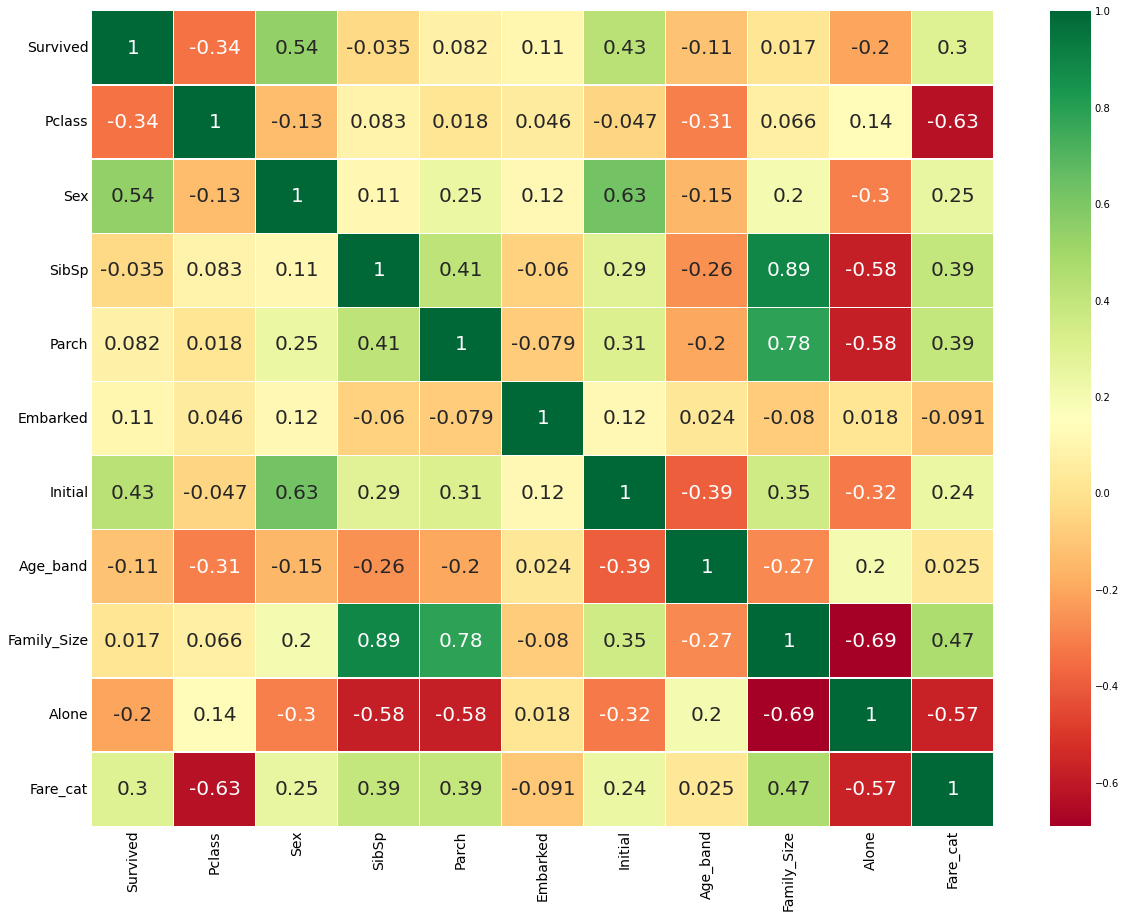

In [45]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
# 상관관계에 포함시키지않을 컬럼 삭제
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Part3: Predictive Modeling

In [46]:
# 필요한 라이브러리 불러오기
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [52]:
# 학습, 테스트 데이터 분리
train, test = train_test_split(data, test_size=0.3, random_state=0,stratify=data['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

In [54]:
# Radial Support Vector Machines(rbf-SVM)

model=svm.SVC(kernel='rbf', C = 1, gamma = 0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.835820895522388


In [55]:
# Linear Support Vector Machine(linear-SVM)
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.8171641791044776


In [56]:
# Logistic Regression
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8134328358208955


In [57]:
# Decision Tree
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.7947761194029851


# K-Nearest Neighbours(KNN)

[KNN 보충](https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-6-K-%EC%B5%9C%EA%B7%BC%EC%A0%91%EC%9D%B4%EC%9B%83KNN)

In [58]:
# K-Nearest Neighbours(KNN)
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.8134328358208955


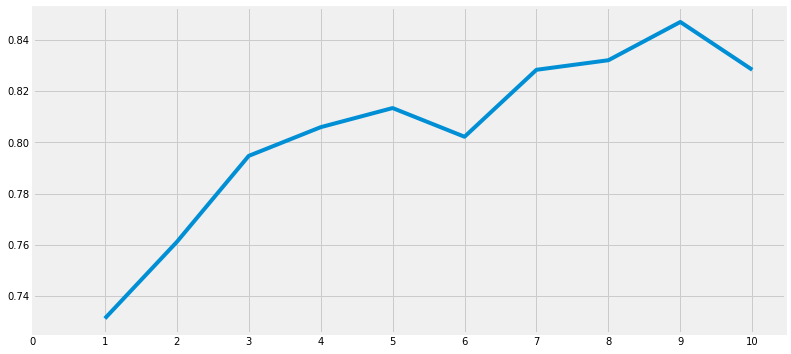

Accuracies for different values of n are: [0.73134328 0.76119403 0.79477612 0.80597015 0.81343284 0.80223881
 0.82835821 0.83208955 0.84701493 0.82835821] with the max value as  0.8470149253731343


In [60]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

In [61]:
# Gaussian Naive Bayes
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


In [62]:
# Random Forests
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.8134328358208955


# Cross Validation

In [64]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

kfold = KFold(n_splits=10, random_state=22)

xyz = []
accuracy = []
std = []
classifiers = ['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']

models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),
        LogisticRegression(),KNeighborsClassifier(n_neighbors=9),
        DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]

for i in models:
  model = i
  cv_result = cross_val_score(model,X,Y,cv = kfold,scoring = "accuracy")
  cv_result=cv_result
  xyz.append(cv_result.mean())
  std.append(cv_result.std())
  accuracy.append(cv_result)

new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2


ValueError: ignored